# Proteogenomics of breast cancer






## 1. Data read  and cleaning 


In [184]:
# Import libraries necessary for this project

import pandas as pd 
import numpy as np
import os as os

import matplotlib.pyplot as pl
from IPython.display import display 

%matplotlib inline

In [185]:
#data read 


# Load the clinical and expression data as well as the mapping proteins data set 
try:
    clinical_data = pd.read_csv("clinical_data_breast_cancer.csv")  
    expression_data=pd.read_csv("77_cancer_proteomes_CPTAC_itraq.csv")
    mapping_proteins=pd.read_csv("PAM50_proteins.csv")

    print(" Clinical data has {} samples with {} features each.".format(*clinical_data.shape))
    print(" Expression data has {} samples with {} features each.".format(*expression_data.shape))
    print(" Protein mapping data has {} samples with {} features each.".format(*mapping_proteins.shape))

except:
    print("One or more datasets could not be loaded. Is the dataset missing?")

 Clinical data has 105 samples with 30 features each.
 Expression data has 12553 samples with 86 features each.
 Protein mapping data has 100 samples with 4 features each.


In [186]:
display(clinical_data.head(n=1))

,Complete TCGA ID,Gender,Age at Initial Pathologic Diagnosis,ER Status,PR Status,HER2 Final Status,Tumor,Tumor--T1 Coded,Node,Node-Coded,...,PAM50 mRNA,SigClust Unsupervised mRNA,SigClust Intrinsic mRNA,miRNA Clusters,methylation Clusters,RPPA Clusters,CN Clusters,Integrated Clusters (with PAM50),Integrated Clusters (no exp),Integrated Clusters (unsup exp)
0,TCGA-A2-A0T2,FEMALE,66,Negative,Negative,Negative,T3,T_Other,N3,Positive,...,Basal-like,0,-13,3,5,Basal,3,2,2,2


In [187]:
display(expression_data.head(n=1))

,RefSeq_accession_number,gene_symbol,gene_name,AO-A12D.01TCGA,C8-A131.01TCGA,AO-A12B.01TCGA,BH-A18Q.02TCGA,C8-A130.02TCGA,C8-A138.03TCGA,E2-A154.03TCGA,...,AO-A12B.34TCGA,A2-A0SW.35TCGA,AO-A0JL.35TCGA,BH-A0BV.35TCGA,A2-A0YM.36TCGA,BH-A0C7.36TCGA,A2-A0SX.36TCGA,263d3f-I.CPTAC,blcdb9-I.CPTAC,c4155b-C.CPTAC
0,NP_958782,PLEC,plectin isoform 1,1.096131,2.609943,-0.659828,0.195341,-0.49406,2.765081,0.862659,...,-0.963904,-0.487772,-0.10668,-0.065838,0.65585,-0.552212,-0.39856,0.598585,-0.191285,0.566975


In [188]:
display(mapping_proteins.head(n=1))

,GeneSymbol,RefSeqProteinID,Species,Gene Name
0,MIA,NP_006524,Homo sapiens,melanoma inhibitory activity


In [189]:
#cleanup column names  clinical data and mapping proteins 
clinical_data.columns =clinical_data.columns.str.replace(' |-', '_')
clinical_data.columns = map(str.lower, clinical_data.columns)
mapping_proteins.columns=map(str.lower, mapping_proteins.columns)
mapping_proteins.columns=mapping_proteins.columns.str.replace(' ','_')

In [190]:
display(clinical_data.head(n=1))

,complete_tcga_id,gender,age_at_initial_pathologic_diagnosis,er_status,pr_status,her2_final_status,tumor,tumor__t1_coded,node,node_coded,...,pam50_mrna,sigclust_unsupervised_mrna,sigclust_intrinsic_mrna,mirna_clusters,methylation_clusters,rppa_clusters,cn_clusters,integrated_clusters_(with_pam50),integrated_clusters_(no_exp),integrated_clusters_(unsup_exp)
0,TCGA-A2-A0T2,FEMALE,66,Negative,Negative,Negative,T3,T_Other,N3,Positive,...,Basal-like,0,-13,3,5,Basal,3,2,2,2


In [191]:
# rename id column 
mapping_proteins.rename(columns={'refseqproteinid':'RefSeq_accession_number'}, inplace=True)

In [192]:
#expr_mapped = pd.merge(expression_data,
 #                mapping_proteins,
  #               on='RefSeq_accession_number', 
   #              how='left')

## 2. Exploratory data analysis 

We have to prepare the two data sets for the different ML tasks . Initially we will use the expression data in a clustering task , trying to identify molecular signatures which we will then try to use aas predictors in the classification task. 

### 2.1 Descriptive analysis and feature engineering on the clinical dataset 

In [193]:
#Description of categorical variables 

      
print("Unique values in Gender: " + ', '.join(clinical_data['gender'].unique()))
print("Unique values in Estrogen response status: " + ', '.join(clinical_data['er_status'].unique()))
print("Unique values in Progesterone response status: " + ', '.join(clinical_data['pr_status'].unique()))
print("Unique values in human epidermal growth factor receptor 2 (HER2), final status: " + ', '.join(clinical_data['her2_final_status'].unique()))
print("Unique values in Tumor " + ', '.join(clinical_data['tumor'].unique()))
print("Unique values in Tumor T1 coded:" + ', '.join(clinical_data['tumor__t1_coded'].unique()))
print("Unique values in Tumor Node: " + ', '.join(clinical_data['node'].unique()))
print("Unique values in Node coded:  " + ', '.join(clinical_data['node_coded'].unique()))
print("Unique values in PAM50 mRNA: " + ', '.join(clinical_data['pam50_mrna'].unique()))
print("Unique values in Metastasis:  " + ', '.join(clinical_data['metastasis'].unique()))
print("Unique values in Metastasis Coded: " + ', '.join(clinical_data['metastasis_coded'].unique()))
print("Unique values in Breast Cancer stage:  " + ', '.join(clinical_data['ajcc_stage'].unique()))
print("Unique values in converted breast cancer stage:  " + ', '.join(clinical_data['converted_stage'].unique()))
print("Unique values in Vital status: " + ', '.join(clinical_data['vital_status'].unique()))
print("Unique values in RPAA clusters: " + ', '.join(clinical_data['rppa_clusters'].unique()))

Unique values in Gender: FEMALE, MALE
Unique values in Estrogen response status: Negative, Indeterminate, Positive
Unique values in Progesterone response status: Negative, Positive
Unique values in human epidermal growth factor receptor 2 (HER2), final status: Negative, Positive, Equivocal
Unique values in Tumor T3, T2, T1, T4
Unique values in Tumor T1 coded:T_Other, T1
Unique values in Tumor Node: N3, N0, N1, N2
Unique values in Node coded:  Positive, Negative
Unique values in PAM50 mRNA: Basal-like, HER2-enriched, Luminal A, Luminal B
Unique values in Metastasis:  M1, M0
Unique values in Metastasis Coded: Positive, Negative
Unique values in Breast Cancer stage:  Stage IV, Stage IIA, Stage IIB, Stage IIIC, Stage IA, Stage IIIA, Stage IIIB, Stage II, Stage I, Stage III, Stage IB
Unique values in converted breast cancer stage:  No_Conversion, Stage IIA, Stage IIB, Stage I, Stage IIIA, Stage IIIC, Stage IIIB
Unique values in Vital status: DECEASED, LIVING
Unique values in RPAA clusters: 

In [194]:
# we keep the metastasis coded feature and the tumor size grouping in the tumor column
clinical_final=clinical_data.drop(["metastasis","tumor__t1_coded"], axis=1) 


Text(0.5, 1.0, 'Occurences of cancer type based on mRNA PAM50')

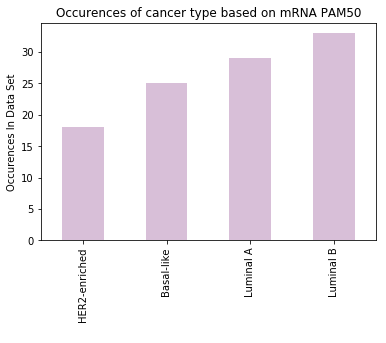

In [195]:
#For the classification task, we will try to predict the cancer subtype, described by the pam50 column 
target_counts= clinical_final['pam50_mrna'].value_counts(ascending=True)

target_counts =  target_counts.plot(kind='bar', color = '#D8BFD8')
target_counts.set_xlabel(" ")
target_counts.set_ylabel("Occurences In Data Set")
target_counts.set_title("Occurences of cancer type based on mRNA PAM50")


In [196]:
clinical_final.describe() # numerical 

,age_at_initial_pathologic_diagnosis,days_to_date_of_last_contact,days_to_date_of_death,os_event,os_time,sigclust_unsupervised_mrna,sigclust_intrinsic_mrna,mirna_clusters,methylation_clusters,cn_clusters,integrated_clusters_(with_pam50),integrated_clusters_(no_exp),integrated_clusters_(unsup_exp)
count,105.000000,105.000000,11.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000
mean,58.685714,788.390476,1254.454545,0.104762,817.647619,-4.885714,-7.180952,4.000000,3.342857,2.590476,2.742857,1.980952,2.352381
std,13.066630,645.283040,678.050642,0.307715,672.026613,3.558074,5.022605,1.593255,1.406226,1.342323,1.074428,0.970537,1.091761
min,30.000000,0.000000,160.000000,0.000000,0.000000,-12.000000,-13.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,49.000000,240.000000,947.500000,0.000000,240.000000,-6.000000,-12.000000,3.000000,2.000000,1.000000,2.000000,1.000000,1.000000
50%,58.000000,643.000000,1364.000000,0.000000,665.000000,-5.000000,-6.000000,4.000000,4.000000,3.000000,3.000000,2.000000,2.000000
75%,67.000000,1288.000000,1627.500000,0.000000,1305.000000,-3.000000,-2.000000,5.000000,4.000000,3.000000,4.000000,3.000000,3.000000
max,88.000000,2850.000000,2483.000000,1.000000,2850.000000,0.000000,0.000000,7.000000,5.000000,5.000000,4.000000,4.000000,5.000000


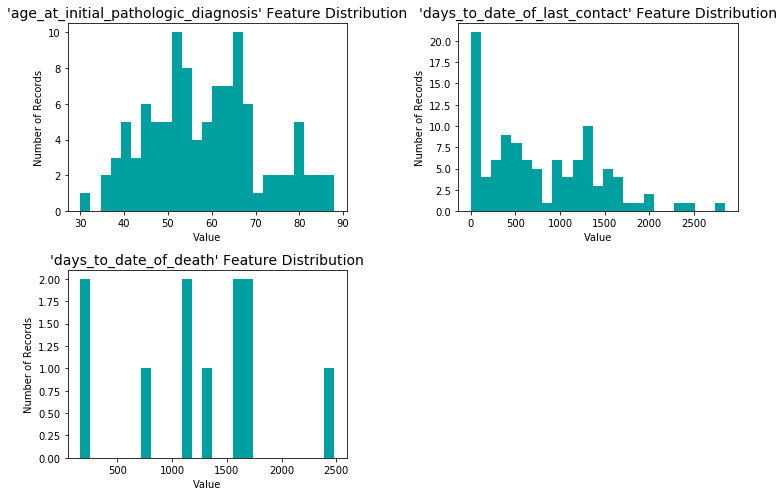

In [199]:
fig = pl.figure(figsize = (11,7));


# age and contact info plotting 
for i, feature in enumerate(['age_at_initial_pathologic_diagnosis','days_to_date_of_last_contact','days_to_date_of_death']):
        ax = fig.add_subplot(2, 2, i+1)
        ax.hist(clinical_final[feature], bins = 25, color = '#00A0A0')
        ax.set_title("'%s' Feature Distribution"%(feature), fontsize = 14)
        ax.set_xlabel("Value")
        ax.set_ylabel("Number of Records")
        
fig.tight_layout()
fig.show()



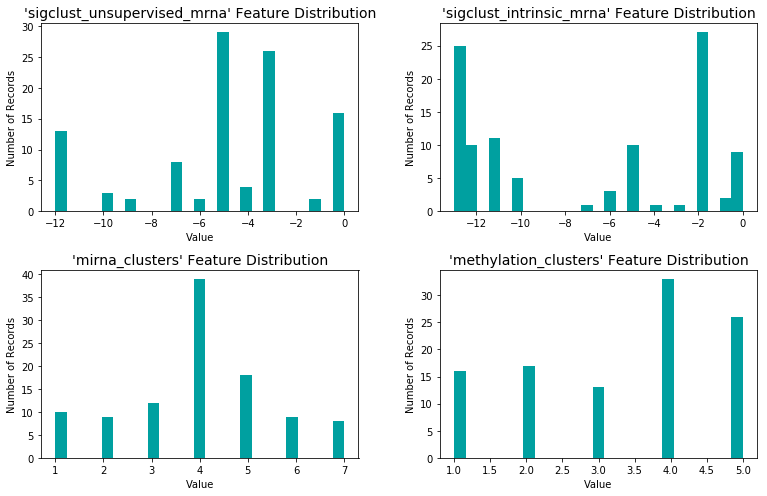

In [207]:
# miRNA CLUSTERS 

fig = pl.figure(figsize = (11,7));


# age and contact info plotting 
for i, feature in enumerate(['sigclust_unsupervised_mrna','sigclust_intrinsic_mrna','mirna_clusters','methylation_clusters']):
        ax = fig.add_subplot(2, 2, i+1)
        ax.hist(clinical_final[feature], bins = 25, color = '#00A0A0')
        ax.set_title("'%s' Feature Distribution"%(feature), fontsize = 14)
        ax.set_xlabel("Value")
        ax.set_ylabel("Number of Records")
        
fig.tight_layout()
fig.show()

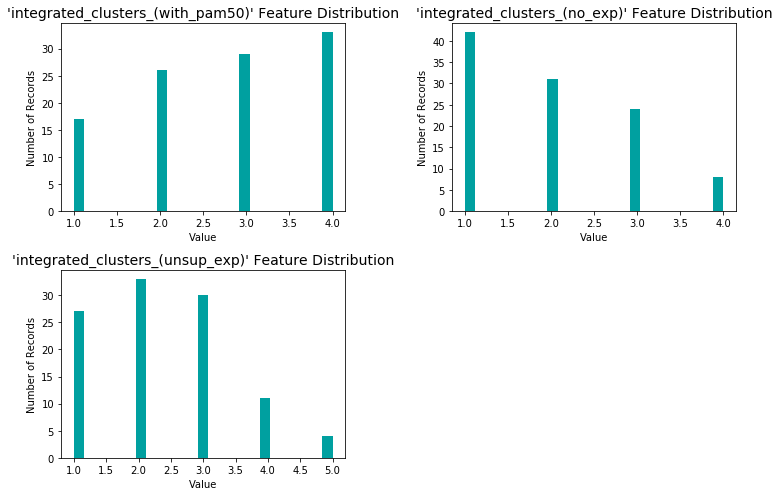

In [201]:
fig = pl.figure(figsize = (11,7));


# age and contact info plotting 
for i, feature in enumerate(['integrated_clusters_(with_pam50)','integrated_clusters_(no_exp)','integrated_clusters_(unsup_exp)']):
        ax = fig.add_subplot(2, 2, i+1)
        ax.hist(clinical_final[feature], bins = 25, color = '#00A0A0')
        ax.set_title("'%s' Feature Distribution"%(feature), fontsize = 14)
        ax.set_xlabel("Value")
        ax.set_ylabel("Number of Records")
        
fig.tight_layout()
fig.show()

https://www.cancer.gov/publications/dictionaries/cancer-terms/def/os

Overall survival 
Os event - whether a treatment has been registered 
Os time - time since 

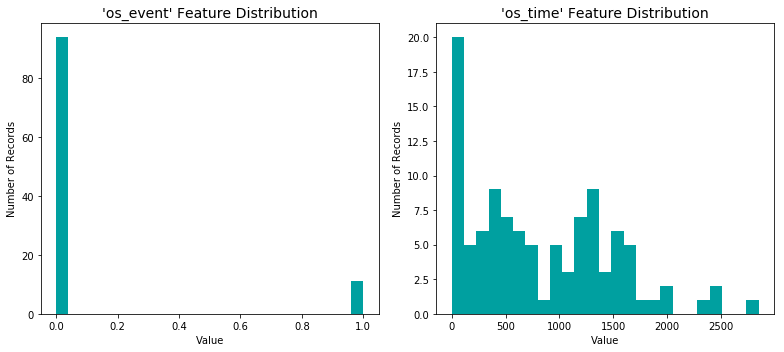

In [202]:
fig = pl.figure(figsize = (11,5));

# Overall survival plotting 
for i, feature in enumerate(['os_event','os_time']):
        ax = fig.add_subplot(1, 2, i+1)
        ax.hist(clinical_final[feature], bins = 25, color = '#00A0A0')
        ax.set_title("'%s' Feature Distribution"%(feature), fontsize = 14)
        ax.set_xlabel("Value")
        ax.set_ylabel("Number of Records")
        
fig.tight_layout()




Overall survival (OS)
* OS event - whether a treatment has been registered 
* OS time - The length of time from either the date of diagnosis or the start of treatment for a disease, such as cancer, that patients diagnosed with the disease are still alive.The length of time from either the date of diagnosis or the start of treatment for a disease, such as cancer, that patients diagnosed with the disease are still alive.fig.show()

Most patients do not have an os event registered so we will drop this column, while keeping the overall survival time.

In [203]:
clinical_final=clinical_final.drop(["os_event"], axis=1) 

In [215]:
# Log-transform the skewed features
cancer_type= clinical_final['pam50_mrna']
features_raw = clinical_final.drop(['pam50_mrna','complete_tcga_id'], axis = 1) # drop target and unique id 
skewed = ['days_to_date_of_last_contact', 'os_time','days_to_date_of_death']
features_log_transformed = pd.DataFrame(data = features_raw)
features_log_transformed[skewed] = features_raw[skewed].apply(lambda x: np.log(x + 1))

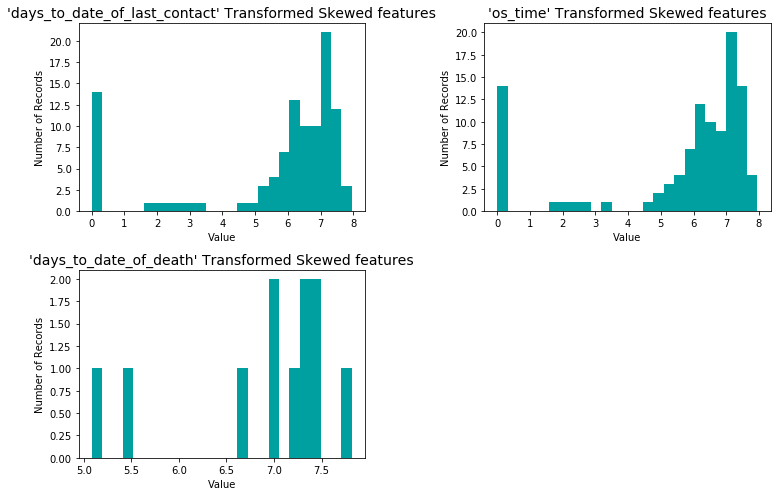

In [227]:
fig = pl.figure(figsize = (11,7));

# Overall survival plotting 
for i, feature in enumerate(['days_to_date_of_last_contact','os_time', 'days_to_date_of_death']):
        ax = fig.add_subplot(2, 2, i+1)
        ax.hist(features_log_transformed[feature], bins = 25, color = '#00A0A0')
        ax.set_title("'%s' Transformed Skewed features"%(feature), fontsize = 14)
        ax.set_xlabel("Value")
        ax.set_ylabel("Number of Records")
        
fig.tight_layout()

In [217]:
# Import sklearn.preprocessing.StandardScaler
from sklearn.preprocessing import MinMaxScaler

# Initialize a scaler, then apply it to the features
scaler = MinMaxScaler() # default=(0, 1)
numerical = ['age_at_initial_pathologic_diagnosis'] 

features_log_minmax_transform = pd.DataFrame(data = features_log_transformed)
features_log_minmax_transform[numerical] = scaler.fit_transform(features_log_transformed[numerical])

# Show an example of a record with scaling applied
display(features_log_minmax_transform.head(n = 5))

/Users/andra/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


,gender,age_at_initial_pathologic_diagnosis,er_status,pr_status,her2_final_status,tumor,node,node_coded,metastasis_coded,ajcc_stage,...,os_time,sigclust_unsupervised_mrna,sigclust_intrinsic_mrna,mirna_clusters,methylation_clusters,rppa_clusters,cn_clusters,integrated_clusters_(with_pam50),integrated_clusters_(no_exp),integrated_clusters_(unsup_exp)
0,FEMALE,0.620690,Negative,Negative,Negative,T3,N3,Positive,Positive,Stage IV,...,5.484797,0,-13,3,5,Basal,3,2,2,2
1,FEMALE,0.172414,Negative,Negative,Negative,T2,N0,Negative,Negative,Stage IIA,...,6.626718,-12,-13,4,4,Basal,4,2,1,1
2,FEMALE,0.310345,Negative,Negative,Negative,T2,N1,Positive,Negative,Stage IIB,...,7.349874,-12,-13,5,5,Basal,1,2,2,2
3,FEMALE,0.448276,Negative,Negative,Negative,T2,N1,Positive,Negative,Stage IIB,...,7.434257,-12,-13,5,5,Basal,1,2,2,2
4,FEMALE,0.137931,Negative,Negative,Negative,T3,N3,Positive,Negative,Stage IIIC,...,4.897840,0,-13,5,5,Basal,1,2,2,2


In [254]:
df=features_log_minmax_transform
display(df.head(n=5))
#

,gender,age_at_initial_pathologic_diagnosis,er_status,pr_status,her2_final_status,tumor,node,node_coded,metastasis_coded,ajcc_stage,...,mirna_clusters,methylation_clusters,rppa_clusters,cn_clusters,integrated_clusters_(with_pam50),integrated_clusters_(no_exp),integrated_clusters_(unsup_exp),labelled_sigclust_unsupervised_mrna,binned,equal_or_lower_than_8
0,FEMALE,0.620690,Negative,Negative,Negative,T3,N3,Positive,Positive,Stage IV,...,3,5,Basal,3,2,2,2,other,NaN,NaN
1,FEMALE,0.172414,Negative,Negative,Negative,T2,N0,Negative,Negative,Stage IIA,...,4,4,Basal,4,2,1,1,lowest,NaN,True
2,FEMALE,0.310345,Negative,Negative,Negative,T2,N1,Positive,Negative,Stage IIB,...,5,5,Basal,1,2,2,2,lowest,NaN,True
3,FEMALE,0.448276,Negative,Negative,Negative,T2,N1,Positive,Negative,Stage IIB,...,5,5,Basal,1,2,2,2,lowest,NaN,True
4,FEMALE,0.137931,Negative,Negative,Negative,T3,N3,Positive,Negative,Stage IIIC,...,5,5,Basal,1,2,2,2,other,NaN,NaN
